# Python Cheat Sheet: Linear Regression

## Load the dataset

In [3]:
import pandas as pd

In [4]:
# Load data: load file from github repository
tips = pd.read_csv('https://raw.githubusercontent.com/GrantCa24/Python-CheatSheet/main/data_raw/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Data Cleaning

In [6]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
rows, columns = tips.shape
print(f"rows: {rows}, columns: {columns}")

rows: 244, columns: 7


In [8]:
# Iterate through all columns, and get the unique values in each columns
for column in tips.columns:
    print(column, ": ", tips[column].unique())

total_bill :  [16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 13.81 11.02 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07 26.86 25.28
 14.73 10.51 27.2  22.76 17.29 19.44 16.66 10.07 32.68 15.98 34.83 13.03
 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17 27.28 12.03 12.46
 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21 18.24 14.31 14.    7.25
 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08 11.69 13.42 14.26 15.95
 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27 11.17 12.26 18.26  8.51
 14.15 16.   13.16 17.47 34.3  41.19 27.05 16.43  8.35 18.64 11.87  9.78
  7.51 14.07 13.13 17.26 24.55 19.77 29.85 48.17 25.   13.39 16.49 21.5
 12.66 16.21 17.51 24.52 20.76 31.71 10

### Encoding

In [10]:
# Categorical encoding: mapping
tips["sex"] = tips["sex"].map({"Female": 0, "Male": 1})
tips["smoker"] = tips["smoker"].map({"No": 0, "Yes": 1})
tips["day"] = tips["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
tips["time"] = tips["time"].map({"Lunch": 0, "Dinner": 1})
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


### **Split dataset to X and Y variables**

In [12]:
# Target variable to predict
Y = tips.tip
Y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [13]:
# Attributes used by the model to make predictions.
X = tips.drop(['tip'], axis=1) # Instructing pandas to look for a column to drop
X

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,3,1,2
1,10.34,1,0,3,1,3
2,21.01,1,0,3,1,3
3,23.68,1,0,3,1,2
4,24.59,0,0,3,1,4
...,...,...,...,...,...,...
239,29.03,1,0,2,1,3
240,27.18,0,1,2,1,2
241,22.67,1,1,2,1,2
242,17.82,1,0,2,1,2


## **Data split**

In [15]:
from sklearn.model_selection import train_test_split

### **Perform 80/20 Data split**

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) # Train 0.8 / Test 0.2

### **Check Data dimension**

In [19]:
X_train.shape, Y_train.shape

((195, 6), (195,))

In [20]:
X_test.shape, Y_test.shape

((49, 6), (49,))

## **Linear Regression Model**

In [22]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### **Build linear regression**

#### Defines the regression model

In [25]:
model = linear_model.LinearRegression()

#### Build training model

In [27]:
model.fit(X_train, Y_train)

LinearRegression()

#### Apply trained model to make prediction (on test set)

In [29]:
Y_pred = model.predict(X_test)

## **Prediction results**

### **Print model performance**

In [32]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [ 0.08172976 -0.06752283  0.02305777  0.08189123 -0.18634528  0.22535988]
Intercept: 0.8011595145433645
Mean squared error (MSE): 1.16
Coefficient of determination (R^2): 0.55


### Show the Linear Regression fomula

In [34]:
X_list = list(X.columns)
X_list

['total_bill', 'sex', 'smoker', 'day', 'time', 'size']

In [35]:
Coef_dict = dict(zip(X_list, model.coef_))
print(Coef_dict)

{'total_bill': 0.08172976278915729, 'sex': -0.06752283115761358, 'smoker': 0.02305777469777107, 'day': 0.08189122871708622, 'time': -0.18634527728790737, 'size': 0.2253598822524065}


In [39]:
print(f"{Y.name} =")
for key, value in Coef_dict.items():
    print(f"{round(value, 2)} * {key}")
print(f"+ {model.intercept_}")

tip =
0.08 * total_bill
-0.07 * sex
0.02 * smoker
0.08 * day
-0.19 * time
0.23 * size
+ 0.8011595145433645


## **Scatter plots**

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

### Make Scatter plot

#### The Data

In [46]:
Y_test

20      4.08
0       1.01
115     3.50
119     2.92
84      2.03
202     2.00
170    10.00
182     3.50
98      3.00
196     2.00
43      1.32
218     1.44
38      2.31
96      4.00
157     3.75
39      5.00
52      5.20
4       3.61
95      4.73
77      4.00
116     5.07
32      3.00
61      2.00
94      3.25
144     2.30
186     3.50
103     3.48
41      2.54
185     5.00
23      7.58
233     1.47
64      2.64
150     2.50
134     3.25
72      3.14
56      3.00
122     2.50
46      5.00
241     2.00
194     4.00
92      1.00
201     2.01
173     3.18
31      2.50
148     1.73
104     4.08
2       3.50
50      2.50
168     1.61
Name: tip, dtype: float64

In [48]:
import numpy as np
np.array(Y_test)

array([ 4.08,  1.01,  3.5 ,  2.92,  2.03,  2.  , 10.  ,  3.5 ,  3.  ,
        2.  ,  1.32,  1.44,  2.31,  4.  ,  3.75,  5.  ,  5.2 ,  3.61,
        4.73,  4.  ,  5.07,  3.  ,  2.  ,  3.25,  2.3 ,  3.5 ,  3.48,
        2.54,  5.  ,  7.58,  1.47,  2.64,  2.5 ,  3.25,  3.14,  3.  ,
        2.5 ,  5.  ,  2.  ,  4.  ,  1.  ,  2.01,  3.18,  2.5 ,  1.73,
        4.08,  3.5 ,  2.5 ,  1.61])

In [50]:
Y_pred

array([2.62639098, 2.69979636, 2.72594988, 3.67065173, 2.49039806,
       2.33742397, 5.56290053, 5.19854726, 2.82010249, 2.05249997,
       2.03482896, 1.81743977, 2.91468278, 3.3325481 , 3.80517152,
       3.94284319, 4.6069405 , 3.77166232, 4.83676451, 3.85812576,
       4.14057642, 2.46016669, 2.31353943, 3.00677733, 2.59469928,
       3.26777739, 3.08475552, 2.67068652, 3.6107533 , 4.83430064,
       2.04202317, 2.82478004, 2.39362262, 2.74426475, 3.44763566,
       4.74211945, 2.34982287, 3.06053748, 3.03766513, 2.56249369,
       1.64042914, 2.31617423, 3.86983558, 3.11225454, 1.98367353,
       2.9391031 , 3.18618706, 2.26857608, 2.11789242])

#### Show scatter plot

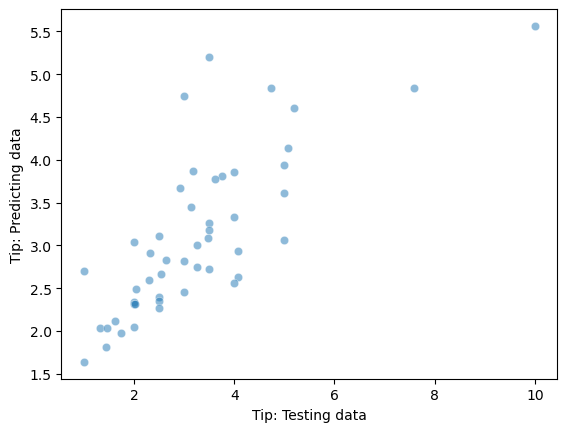

In [53]:
sns.scatterplot(x=Y_test, y=Y_pred, alpha=0.5) # Make the marker transaprent as 0.5
plt.xlabel('Tip: Testing data')
plt.ylabel('Tip: Predicting data')
plt.show()